# Case review
## fruit-counting
* markdown syntax

In [23]:
fruit_count = {}
fruits = ['a', 'b', 'c', 'a', 'd', 'a', 'w', 'b']
for fruit in fruits:
    if fruit not in fruit_count:
        fruit_count[fruit] = 1
    else:
        fruit_count[fruit] = fruit_count[fruit] + 1

## Calculating word frequency

In [3]:
import string
string_a = "In 2004, Obama received national attention during his campaign to represent Illinois in the United States Senate with his victory in the March Democratic Party primary, his keynote address at the Democratic National Convention in July, and his election to the Senate in November. He began his presidential campaign in 2007 and, after a close primary campaign against Hillary Rodham Clinton in 2008, he won sufficient delegates in the Democratic Party primaries to receive the presidential nomination. He then defeated Republican nominee John McCain in the general election, and was inaugurated as president on January 20, 2009. Nine months after his inauguration, Obama was named the 2009 Nobel Peace Prize laureate"
translator = str.maketrans('','',string.punctuation)
string_a = string_a.translate(translator)
string_a = string_a.lower()
word_freq = {}
for w in string_a.split():
    if w not in word_freq: # dictionary key-value initilization
        word_freq[w] = 0
    word_freq[w] += 1
len(word_freq)

71

## ubike

In [ ]:
import requests
import json
response = requests.get('http://data.taipei/youbike')
# print(type(response)) # <class 'requests.models.Response'>
# print(type(response.text)) # <class 'str'>
data = json.loads(response.text)

# The AQX case

* The case
    * [PM2.5 introduced by 行政院環保署](https://taqm.epa.gov.tw/taqm/tw/default.aspx)
    * https://opendata.epa.gov.tw/

* Data links
    * Data link from 行政院環保署 https://taqm.epa.gov.tw/taqm/aqs.ashx?act=WebCamBox&lang=tw
    * Data link 2 https://taqm.epa.gov.tw/taqm/aqs.ashx?lang=tw&act=aqi-epa&ts=1538460570145

* 看到一筆類似空氣品質的資料，一般會想要做什麼事？
    1. 找到突出的（Prominent）資料：找到最嚴重的地區。如果最嚴重的地區不只一個，那就要列印出多個地區。
    2. 找到突出的（Prominent）資料：不僅找到最嚴重的地區，還要找到前三大、前五大、前10%。
    3. 描述資料分佈概況。例如平均值、四分位數、左/右傾分佈（常態分配、Power low）
    4. 篩選出一些我想看的資料。

* 為什麼要找到這些資料的概況？簡單地說，是為了讓一般人聽得懂，但要求有憑有據。只有資料的分析者和操作者看得到資料，但重點是你今天通常為什麼要做資料分析，是因為你想要傳達給別人，這筆資料有啥特殊之處，或者他平淡無奇。但為了做到這點，你需要用一個他們都聽得懂的語彙，例如「大部分的區域」、「最嚴重的區域」、「前幾大」。然而，這些語彙的邏輯實際上都模糊而不準確，但若你有資料和數學的支持，你就可以說得有信心，有憑有據，而不至於信口開河。

## if-for
* if的應用
    * 選擇性列印出你所要呈現的youbike站台
        * 指定要某幾個
        * 指定要滿載的
        * 指定要少的
    * 找到最大值和最小值
    * 處理缺漏值，AQX不定期地會有缺漏值，要用if來偵測是否有缺漏值，並指定遇到缺漏值要怎麼做處理。
    * 範例：查驗輸入的日期是否合理
* if-for應用
    * 計算文字的出現次數counting and ploting the word frequency
    * 找到最大或者是前三大的PM2.5站台finding the maximum and top 3 PM2.5 sites
    * 練習與作業：Rescaling the PM2.5 values。將PM2.5對應到1~10好進行視覺化或者發佈一般使用者聽得懂的數據（例如，若告訴一個使用者PM2.5是67，他可能不知道這個數字代表什麼意義，但你若透過一個標準的Mapping把它mapping到高，並告訴使用者說現在這個區域PM2.5是高，那他就聽得懂，而你的轉換也有憑有據）。


## Loading AQX data


In [2]:
import requests
import json
url = " https://taqm.epa.gov.tw/taqm/aqs.ashx?lang=tw&act=aqi-epa&ts=1538460570145"
response = requests.get(url)
aqdata = json.loads(response.text)

In [3]:
print(type(aqdata))
print(aqdata.keys())
print(type(aqdata["Data"]))
print(aqdata["Data"][0])
print(aqdata["Data"][0].keys())
print(aqdata)

<class 'dict'>
dict_keys(['Result', 'Data'])
<class 'list'>
{'SiteId': '84', 'SiteName': '富貴角', 'SiteKey': 'FugueiCape', 'AreaKey': 'North', 'MonobjName': '背景', 'Address': '新北市石門區富貴角海邊', 'lat': '25.294147', 'lng': '121.539141', 'AQI': '58', 'MainPollutant': '臭氧八小時', 'MainPollutantKey': 'O3_8hr', 'CityCode': '31', 'PM10': '59', 'PM10_AVG': '52', 'PM25': '14', 'PM25_AVG': '13', 'O3': '60', 'O3_8': '57', 'SO2': '0.2', 'CO': '0.12', 'CO_8': '0.10', 'NO2': '1', 'SO2_VFLAG': '1', 'CO_VFLAG': '1', 'O3_VFLAG': '1', 'PM10_VFLAG': '1', 'NO2_VFLAG': '1', 'THC_VFLAG': '1', 'PM25_VFLAG': '1', 'SO2_PRETXT': '', 'CO_PRETXT': '', 'O3_PRETXT': '', 'NO2_PRETXT': '', 'HO_AQI_VAL': '58', 'THC': '1.8', 'x': '121', 'y': '86', 'DataSrc': 'epa', 'Time': '2018-10-03 23:00:00', 'AQIStyle': 'AQI2'}
dict_keys(['SiteId', 'SiteName', 'SiteKey', 'AreaKey', 'MonobjName', 'Address', 'lat', 'lng', 'AQI', 'MainPollutant', 'MainPollutantKey', 'CityCode', 'PM10', 'PM10_AVG', 'PM25', 'PM25_AVG', 'O3', 'O3_8', 'SO2', 'CO', 

## Print out data by for-loop
* print formation rules https://docs.python.org/3/tutorial/inputoutput.html

In [5]:
for site in aqdata["Data"]:
    print(site["SiteName"], site["AQI"], site["PM25"])
#     print("{}\t{}\t{}".format(site["SiteName"], site["AQI"], site["PM25"]))

富貴角 58 14
陽明 47 5
萬里 65 12
淡水 44 13
基隆 48 8
士林 47 5
林口 46 6
三重 47 8
菜寮 36 12
汐止 46 13
大同 44 11
中山 31 3
大園 43 6
松山 44 17
萬華 31 10
新莊 44 10
觀音 57 17
古亭 43 12
永和 37 10
板橋 38 13
桃園 34 8
土城 48 14
新店 40 12
平鎮 43 5
中壢 35 13
龍潭 43 10
湖口 48 13
新竹 50 13
竹東 42 14
頭份 57 17
苗栗 50 15
三義 48 17
豐原  7
沙鹿 44 11
西屯 53 24
忠明 49 15
線西 52 14
大里 40 9
彰化 48 8
埔里 64 19
二林 47 13
南投 53 13
竹山 63 21
麥寮 93 18
臺西 57 16
斗六 73 21
新港 62 15
朴子 94 11
嘉義 60 18
新營 70 18
善化 77 16
安南 81 18
臺南 74 17
美濃 74 25
橋頭 85 25
楠梓 96 20
仁武 88 15
左營 82 19
屏東 89 31
前金 84 22
鳳山 80 21
復興 84 24
前鎮 88 18
小港 75 20
大寮 88 34
潮州 84 23
林園 126 21
恆春 49 11
宜蘭 40 10
冬山 43 3
花蓮 44 15
關山 48 13
臺東 44 11
馬祖 129 21
金門 84 19
馬公 74 14
臺南(玉井) 58 12
彰化(大城) 50 13
崙背 68 19
屏東(琉球) 101 20


## (Wrong) if-else to deal missing value of PM2.5

In [31]:
for site in aqdata["Data"]:
    if site["PM25"] == "":
        site["PM25"] == -1
    else:
        site["PM25"] == int(site["PM25"])
for site in aqdata["Data"]:
    print(site["SiteName"], site["AQI"], site["PM25"])

yes
yes
yes
yes
富貴角 97 11
陽明 74 10
萬里 101 12
淡水 49 14
基隆 77 8
士林 87 14
林口 61 
三重 41 4
菜寮 50 14
汐止 48 
大同 51 12
中山 52 14
大園 58 8
松山 49 8
萬華 64 18
新莊 64 9
觀音 71 22
古亭 50 15
永和 51 13
板橋 49 14
桃園 61 19
土城 64 20
新店 54 16
平鎮 80 16
中壢 46 
龍潭 84 20
湖口 90 19
新竹 77 17
竹東 61 11
頭份 90 16
苗栗 74 22
三義 71 23
豐原 44 
沙鹿 90 19
西屯 71 14
忠明 68 16
線西 93 24
大里 60 10
彰化 68 15
埔里 78 27
二林 87 18
南投 100 36
竹山 115 39
麥寮 113 22
臺西 100 16
斗六 116 40
新港 113 21
朴子 116 20
嘉義 121 32
新營 134 40
善化 115 42
安南 124 42
臺南 105 19
美濃 81 42
橋頭 103 39
楠梓 106 43
仁武 77 13
左營 87 40
屏東 79 41
前金  38
鳳山 99 40
復興 92 34
前鎮 98 38
小港 87 33
大寮 91 37
潮州 84 41
林園  33
恆春 112 8
宜蘭 67 14
冬山 71 7
花蓮 51 12
關山 69 23
臺東 68 12
馬祖 136 23
金門 126 22
馬公 129 10
臺南(玉井) 73 32
彰化(大城) 93 15
崙背 92 24
屏東(琉球) 86 41


## Using index to update data
* 希望把遺漏值（missing value，在這個案例中原本是空的字串""）改為整數的-1。

In [36]:
for i in range(len(aqdata["Data"])):
    if aqdata["Data"][i]["PM25"] == "":
        aqdata["Data"][i]["PM25"] = -1
    else:
        aqdata["Data"][i]["PM25"] = int(aqdata["Data"][i]["PM25"])

for site in aqdata["Data"]:
    print(site["SiteName"], site["AQI"], site["PM25"])

富貴角 97 11
陽明 74 10
萬里 101 12
淡水 49 14
基隆 77 8
士林 87 14
林口 61 -1
三重 41 4
菜寮 50 14
汐止 48 -1
大同 51 12
中山 52 14
大園 58 8
松山 49 8
萬華 64 18
新莊 64 9
觀音 71 22
古亭 50 15
永和 51 13
板橋 49 14
桃園 61 19
土城 64 20
新店 54 16
平鎮 80 16
中壢 46 -1
龍潭 84 20
湖口 90 19
新竹 77 17
竹東 61 11
頭份 90 16
苗栗 74 22
三義 71 23
豐原 44 -1
沙鹿 90 19
西屯 71 14
忠明 68 16
線西 93 24
大里 60 10
彰化 68 15
埔里 78 27
二林 87 18
南投 100 36
竹山 115 39
麥寮 113 22
臺西 100 16
斗六 116 40
新港 113 21
朴子 116 20
嘉義 121 32
新營 134 40
善化 115 42
安南 124 42
臺南 105 19
美濃 81 42
橋頭 103 39
楠梓 106 43
仁武 77 13
左營 87 40
屏東 79 41
前金  38
鳳山 99 40
復興 92 34
前鎮 98 38
小港 87 33
大寮 91 37
潮州 84 41
林園  33
恆春 112 8
宜蘭 67 14
冬山 71 7
花蓮 51 12
關山 69 23
臺東 68 12
馬祖 136 23
金門 126 22
馬公 129 10
臺南(玉井) 73 32
彰化(大城) 93 15
崙背 92 24
屏東(琉球) 86 41


## Using enumerate() to access index and data

In [25]:
print(type(enumerate(aqdata["Data"])))
list(enumerate(aqdata["Data"]))
for i, site in enumerate(aqdata["Data"]):
    if site["PM25"] == "":
        aqdata["Data"][i]["PM25"] = -1
    else:
        aqdata["Data"][i]["PM25"] = int(site["PM25"]) 

for site in aqdata["Data"]:
    print(site["SiteName"], site["AQI"], site["PM25"])

<class 'enumerate'>
富貴角 58 14
陽明 47 5
萬里 65 12
淡水 44 13
基隆 48 8
士林 47 5
林口 46 6
三重 47 8
菜寮 36 12
汐止 46 13
大同 44 11
中山 31 3
大園 43 6
松山 44 17
萬華 31 10
新莊 44 10
觀音 57 17
古亭 43 12
永和 37 10
板橋 38 13
桃園 34 8
土城 48 14
新店 40 12
平鎮 43 5
中壢 35 13
龍潭 43 10
湖口 48 13
新竹 50 13
竹東 42 14
頭份 57 17
苗栗 50 15
三義 48 17
豐原  7
沙鹿 44 11
西屯 53 24
忠明 49 15
線西 52 14
大里 40 9
彰化 48 8
埔里 64 19
二林 47 13
南投 53 13
竹山 63 21
麥寮 93 18
臺西 57 16
斗六 73 21
新港 62 15
朴子 94 11
嘉義 60 18
新營 70 18
善化 77 16
安南 81 18
臺南 74 17
美濃 74 25
橋頭 85 25
楠梓 96 20
仁武 88 15
左營 82 19
屏東 89 31
前金 84 22
鳳山 80 21
復興 84 24
前鎮 88 18
小港 75 20
大寮 88 34
潮州 84 23
林園 126 21
恆春 49 11
宜蘭 40 10
冬山 43 3
花蓮 44 15
關山 48 13
臺東 44 11
馬祖 129 21
金門 84 19
馬公 74 14
臺南(玉井) 58 12
彰化(大城) 50 13
崙背 68 19
屏東(琉球) 101 20


## Re-scale data by hand

## Find out extreme terms
* e.g. finding maximum AQX 找到PM2.5最大的區域
* 以下這是個非常好的例子說明要如何運用IF和For找出PM2.5最高的地區。在過程中，必須要注意，原本的資料的資料型態為何，甚至要注意，原本的資料是否有缺漏。當遇到下面這種資料的情形時，最好的方法是要先寫程式把資料處理過一遍。
* 在這個案例中，我希望找出，現在PM2.5最高的是哪些站台，且把該站台列印出來。注意，我要列印的是，PM2.5最高的站台，而不是最高的PM2.5值；此外還要注意，PM2.5最高的站台可能不只一個，這時候該怎麼處理？

### Find out the maximal term
* 找到最大值或最小值的概念：就個人的邏輯思考一下，我要怎麼找到一群數的最小值？解題邏輯：把第一個數先拿來當標準，之後確認過每個數，有沒有比這個數更小的，若有的話，最小值就是找到的那個數，沒有的話，那第一個數就是最小值。


In [27]:
# finding the maximum value
alist = [5, 3, 2, 4, 1, 3, 2, 4, 7, 82, 19, 23, 42]
# mina, maxa = 100, 0
mina = alist[0]
for a in alist:
    if a < mina:
        mina = a
#     print maxa, a
print(mina)
print(min(alist), max(alist), sum(alist), len(alist), float(sum(alist))/len(alist))

1
1 82 197 13 15.153846153846153


In [45]:
print(aqdata["Data"][0].keys())
max_value = 0
for site in aqdata["Data"]:
    if site['PM25'] != "":
        if int(site['PM25']) > max_value:
            max_value = int(site['PM25'])
print(max_value)
for site in aqdata["Data"]:
    if int(site['PM25']) == max_value:
        print(site['SiteName'])

dict_keys(['SiteId', 'SiteName', 'SiteKey', 'AreaKey', 'MonobjName', 'Address', 'lat', 'lng', 'AQI', 'MainPollutant', 'MainPollutantKey', 'CityCode', 'PM10', 'PM10_AVG', 'PM25', 'PM25_AVG', 'O3', 'O3_8', 'SO2', 'CO', 'CO_8', 'NO2', 'SO2_VFLAG', 'CO_VFLAG', 'O3_VFLAG', 'PM10_VFLAG', 'NO2_VFLAG', 'THC_VFLAG', 'PM25_VFLAG', 'SO2_PRETXT', 'CO_PRETXT', 'O3_PRETXT', 'NO2_PRETXT', 'HO_AQI_VAL', 'THC', 'x', 'y', 'DataSrc', 'Time', 'AQIStyle'])
34
大寮


## Practice: finding top 3 site with highest PM2.5 values

## Filter out sites with large PM25

### Appending elements to list
* 在前述找到最小值和最大值的範例中，只需要多開一個變數來記錄最大值或最小值。
* 但若今天想要列印出前三大、五大、前10%的高PM2.5站台，那意謂著你不只要存放一個值，也就是說，你需要用一個list把PM2.5的值通通存下來，經過排序後，你才會知道誰最大。
    1. 先把所有PM2.5的值存下來
    2. 排序
    3. 選擇要print出多大的PM2.5值
* 這樣的做法在資料分析中很常見，比方說我要求得四分位數（Quartile）的第一四分位數或第三四分位數。

In [49]:
pm_list = []
for site in aqdata["Data"]:
    if site['PM25'] != "":
        pm_list.append(int(site['PM25']))
pm_list = sorted(pm_list, reverse = True)
print(pm_list[2])

for site in aqdata["Data"]:
    if int(site['PM25']) >= pm_list[int(len(pm_list)/4)]:
        print(site['SiteName'], site['PM25'])

25
西屯 24
埔里 19
竹山 21
麥寮 18
斗六 21
嘉義 18
新營 18
安南 18
美濃 25
橋頭 25
楠梓 20
左營 19
屏東 31
前金 22
鳳山 21
復興 24
前鎮 18
小港 20
大寮 34
潮州 23
林園 21
馬祖 21
金門 19
崙背 19
屏東(琉球) 20


# More

## The best solution for rescale data

In [68]:
degree = ['L', 'L', 'L', 'M', 'M', 'M', 'H', 'H','H', 'vH']
scaler = [11, 23, 35, 41, 47, 53, 58, 64, 70, 1000]
for site in AQ_data:
    if site['PM25'] != '':
        for i, n in enumerate(scaler):
            if int(site['PM25']) < n:
                d = i
                break
                
        print int(site['PM25']), site['SiteName'], d+1, degree[d]

        

10 基隆 1 L
26 汐止 3 L
8 萬里 1 L
24 新店 3 L
15 土城 2 L
19 板橋 2 L
13 新莊 2 L
16 菜寮 2 L
30 林口 3 L
21 淡水 2 L
18 士林 2 L
27 中山 3 L
27 萬華 3 L
19 古亭 2 L
24 松山 3 L
21 大同 2 L
25 桃園 3 L
22 大園 2 L
20 觀音 2 L
20 平鎮 2 L
15 龍潭 2 L
21 竹東 2 L
22 新竹 2 L
22 頭份 2 L
36 三義 4 M
59 豐原 8 H
32 沙鹿 3 L
50 大里 6 M
66 忠明 9 H
59 西屯 8 H
52 彰化 6 M
42 線西 5 M
30 二林 3 L
31 南投 3 L
24 斗六 3 L
43 崙背 5 M
17 新港 2 L
36 朴子 4 M
35 臺西 4 M
16 嘉義 2 L
23 新營 3 L
31 善化 3 L
27 安南 3 L
27 臺南 3 L
16 美濃 2 L
16 橋頭 2 L
28 仁武 3 L
23 鳳山 3 L
29 大寮 3 L
20 林園 2 L
20 楠梓 2 L
27 前金 3 L
31 前鎮 3 L
21 小港 2 L
25 屏東 3 L
10 潮州 1 L
7 恆春 1 L
16 臺東 2 L
21 花蓮 2 L
20 陽明 2 L
13 宜蘭 2 L
9 冬山 1 L
16 三重 2 L
29 中壢 3 L
19 永和 2 L
28 復興 3 L
48 埔里 6 M
27 馬祖 3 L
28 金門 3 L
17 關山 2 L
33 麥寮 3 L
15 湖口 2 L


In [57]:
print type(AQ_data)
print AQ_data[0]
# print AQ_data[0]['PM2.5'], AQ_data[0]['SiteName']

pm25 = []

for k, v in sorted([(int(site['PM2.5']), site['SiteName']) for site in AQ_data if site['PM2.5'] != ''], reverse=True)[:3]:
    print k, v

# for site in AQ_data:
#     try:
#         pm25.append( int(site['PM2.5']) )
#     except:
#         continue
#     print site['SiteName'], site['PM2.5']
# print sorted(pm25, reverse=True)[:3]

for site in AQ_data:
    try:
        if int(site['PM2.5']) > sorted(pm25, reverse=True)[3]:
            print site['SiteName'], site['PM2.5']
    except:
        continue

<type 'list'>
{u'Status': u'\u666e\u901a', u'PSI': u'51', u'CO': u'0.18', u'PM10': u'23', u'NO': u'.71', u'MajorPollutant': u'\u81ed\u6c27', u'WindDirec': u'92', u'FPMI': u'2', u'PublishTime': u'2016-08-30 10:00', u'SO2': u'1.3', u'County': u'\u57fa\u9686\u5e02', u'SiteName': u'\u57fa\u9686', u'WindSpeed': u'1.5', u'PM2.5': u'12', u'NOx': u'4.15', u'O3': u'61', u'NO2': u'3.4'}
65 豐原
56 忠明
52 臺西


In [12]:
for a in AQ_data:
    print a
    print ""

{u'Status': u'', u'PSI': u'0', u'CO': u'0.46', u'PM10': u'44', u'NO': u'7', u'MajorPollutant': u'', u'WindDirec': u'2.4', u'FPMI': u'', u'PublishTime': u'2016-03-25 12:00', u'SO2': u'2.3', u'County': u'\u9ad8\u96c4\u5e02', u'SiteName': u'\u524d\u91d1', u'WindSpeed': u'2.7', u'PM2.5': u'35', u'NOx': u'33.53', u'O3': u'21', u'NO2': u'27'}

{u'Status': u'\u826f\u597d', u'PSI': u'34', u'CO': u'0.3', u'PM10': u'34', u'NO': u'1.35', u'MajorPollutant': u'', u'WindDirec': u'191', u'FPMI': u'2', u'PublishTime': u'2016-03-25 14:00', u'SO2': u'1.1', u'County': u'\u57fa\u9686\u5e02', u'SiteName': u'\u57fa\u9686', u'WindSpeed': u'1.2', u'PM2.5': u'18', u'NOx': u'12.98', u'O3': u'41', u'NO2': u'12'}

{u'Status': u'\u826f\u597d', u'PSI': u'27', u'CO': u'0.38', u'PM10': u'32', u'NO': u'6.86', u'MajorPollutant': u'', u'WindDirec': u'74', u'FPMI': u'2', u'PublishTime': u'2016-03-25 14:00', u'SO2': u'2.1', u'County': u'\u65b0\u5317\u5e02', u'SiteName': u'\u6c50\u6b62', u'WindSpeed': u'1.1', u'PM2.5': u'1

In [33]:
infile = open('data.json', 'r')
filestr = infile.read()
print type(filestr)
jsonfile = json.loads(filestr)
print type(jsonfile)
for a in jsonfile:
    pm25 = int(a['PM2.5'])
    scale = 0
    degree = "None"
    if 0 <= pm25 <= 11:
        scale = 1
    if 1<=scale<=3:
        degree = "Low"
    print pm25, scale, degree
        


<type 'str'>
<type 'list'>
35 0 None
18 0 None
19 0 None
16 0 None
16 0 None
10 1 Low
15 0 None
17 0 None
12 0 None
14 0 None
18 0 None
15 0 None
14 0 None
15 0 None
13 0 None
20 0 None
9 1 Low
20 0 None
19 0 None
18 0 None
18 0 None
15 0 None
18 0 None
15 0 None
9 1 Low
16 0 None
24 0 None
17 0 None
12 0 None


ValueError: invalid literal for int() with base 10: ''

In [18]:
my_dict = {}
print AQ_data[0].keys()
for site in AQ_data:
#     print site['PM2.5'], site['SiteName']
    if site['PM2.5'] == "":
        site['PM2.5'] = "-1"
    my_dict[site['SiteName']] = int(site['PM2.5'])
maxv = max(my_dict.values())
top3v = sorted(my_dict.values(), reverse=True)[3]
for k, v in my_dict.items():
#     if v == maxv:
#         print k, v
    if v > top3v:
        print k, v

[u'Status', u'PSI', u'CO', u'PM10', u'NO', u'MajorPollutant', u'WindDirec', u'FPMI', u'PublishTime', u'SO2', u'County', u'SiteName', u'WindSpeed', u'PM2.5', u'NOx', u'O3', u'NO2']
南投 48
板橋 50
三重 46


In [1]:
print type(AQ_data)
# print AQ_data
print AQ_data[0].keys()
# for s in AQ_data:
#     print s['PM2.5'], s['SiteName']

NameError: name 'AQ_data' is not defined

# The Youbike Case

## Loading data

In [7]:
import requests
import json
response = requests.get('http://data.taipei/youbike')
print(type(response)) # <class 'requests.models.Response'>
print(type(response.text)) # <class 'str'>
bike_data = json.loads(response.text)

<class 'requests.models.Response'>
<class 'str'>


## 為每筆資料新增ubike的滿站比例
* 目標：假設我用`perc = sbi/tot`現有腳踏車數除以總腳踏車格數作為滿站的比例，並希望每個站的資料中多一個key為`perc`來存放滿站比例

In [9]:
for k in bike_data['retVal']:
    bike_data['retVal'][k]["perc"] = int(bike_data['retVal'][k]["sbi"]) / float(int(bike_data['retVal'][k]["tot"]))
for k in bike_data["retVal"]:
    print("{0:20s}\t{1:.2f}".format(bike_data['retVal'][k]["sna"], bike_data['retVal'][k]["perc"]))

捷運市政府站(3號出口)        	0.14
捷運國父紀念館站(2號出口)      	0.67
台北市政府               	0.03
市民廣場                	0.47
興雅國中                	0.02
臺北南山廣場              	0.25
信義廣場(台北101)         	0.17
世貿三館                	0.35
松德站                 	0.50
台北市災害應變中心           	0.57
三張犁                 	0.71
臺北醫學大學              	0.29
福德公園                	0.40
榮星花園                	0.47
饒河夜市                	0.75
松山家商                	0.60
民生光復路口              	0.35
臺北市藝文推廣處            	0.37
象山公園                	0.33
捷運科技大樓站             	0.60
民生敦化路口              	0.18
松山車站                	0.45
東新國小                	0.75
信義建國路口              	0.70
永吉松信路口              	0.43
捷運昆陽站(1號出口)         	0.38
捷運南港展覽館站(5號出口)      	0.33
五常公園                	0.44
金山愛國路口              	0.15
基隆長興路口              	0.35
辛亥新生路口              	0.47
捷運六張犁站              	0.53
中崙高中                	0.26
捷運行天宮站(1號出口)        	0.31
捷運行天宮站(3號出口)        	0.83
臺大資訊大樓              	0.04
捷運東門站(4號出口)         	0.43
臺灣師範大學(圖書館)         	0.12
南港世貿公園      

## Save bike data to .json

In [11]:
json.dump(bike_data, open('ubike.json', 'w'))

## filtering

### Filter sbi/tot > 0.7

In [15]:
if bike_data['retCode'] == 1:
    for k, v in bike_data['retVal'].items():
        if float(v['sbi'])/int(v['tot']) > 0.7:
            print(k, v['sna'], v['sbi'], v['tot'])
            print("-"*30)


0011 三張犁 47 66
------------------------------
0015 饒河夜市 45 60
------------------------------
0023 東新國小 24 32
------------------------------
0035 捷運行天宮站(3號出口) 25 30
------------------------------
0040 玉成公園 25 34
------------------------------
0048 南港車站(忠孝東路) 31 38
------------------------------
0075 基隆光復路口 26 30
------------------------------
0076 新生長春路口 31 36
------------------------------
0085 信義敦化路口 34 46
------------------------------
0125 華西公園 22 30
------------------------------
0137 國防大學 38 46
------------------------------
0149 北投運動中心 50 62
------------------------------
0162 捷運中山國小站(4號出口) 51 70
------------------------------
0168 河堤國小 38 44
------------------------------
0176 興安華城 78 98
------------------------------
0179 南港公園 39 52
------------------------------
0208 龍山國小 33 46
------------------------------
0220 大稻埕公園 29 36
------------------------------
0223 清江國小 30 40
------------------------------
0255 光復南路22巷口 23 30
------------------------------
0261 健康新城 36 44
---------

### Filter selected keys
* 有時候就想選出一些data entry出來看，如果你剛好知道這些站的id時，可以用`if site in ['0036', '0038', '0132']`來選擇你所需要的sites。


In [24]:
print(bike_data['retVal']['0137'])

for site in bike_data["retVal"].keys():
    if float(bike_data["retVal"][site]['sbi'])/int(bike_data["retVal"][site]['tot']) > 0.1:
        print("%s\t%-20s\t%s\t%s"%(bike_data["retVal"][site]["sno"], 
                                   bike_data["retVal"][site]["sna"], 
                                   bike_data["retVal"][site]['sbi'],
                                   bike_data["retVal"][site]['tot']))

{'sno': '0137', 'sna': '國防大學', 'tot': '46', 'sbi': '38', 'sarea': '北投區', 'mday': '20181004000740', 'lat': '25.137976', 'lng': '121.493066', 'ar': '中央北路二段/豐年路二段交叉口', 'sareaen': 'Beitou Dist.', 'snaen': 'Nat’l Defense U.', 'aren': 'Sec. 2, Zhongyang N. Rd. / Sec. 2, Fengnian Rd.', 'bemp': '8', 'act': '1', 'perc': 0.8260869565217391}
0001	捷運市政府站(3號出口)        	26	180
0002	捷運國父紀念館站(2號出口)      	32	48
0004	市民廣場                	28	60
0006	臺北南山廣場              	20	80
0007	信義廣場(台北101)         	14	80
0008	世貿三館                	21	60
0009	松德站                 	20	40
0010	台北市災害應變中心           	31	54
0011	三張犁                 	47	66
0012	臺北醫學大學              	14	48
0013	福德公園                	23	58
0014	榮星花園                	15	32
0015	饒河夜市                	45	60
0016	松山家商                	29	48
0017	民生光復路口              	12	34
0018	臺北市藝文推廣處            	14	38
0019	象山公園                	10	30
0020	捷運科技大樓站             	42	70
0021	民生敦化路口              	12	66
0022	松山車站                	20	44
0023	東新國小                	

# For
無論是在列數「水果」或者把所有腳踏車站的資訊列印出來，都需要用到一個指令__For__。他會讓程式在指定的範圍內重複執行，所以也經常被稱為__for-each__。

## For - to print all elements in list or all pairs in dictionary

In [ ]:
alist = ['123', 123, 4321, 321, 23]
for a in alist: # temporary
    print a,
print ""
for a in [1, 2, 3, 4, 5]: # temporary
    print a,
print ""

In [14]:
bdict = {1:2, 2:3, 3:4, 4:5, 5:6, 6:7}
print bdict.keys()
print bdict.values()

for k in bdict.keys(): # logic 
    print bdict[k]
    
# for k in bdict: # formal
#     print bdict[k]

123 123 4321 321 23 
1 2 3 4 5 
[1, 2, 3, 4, 5, 6]
[2, 3, 4, 5, 6, 7]
2
3
4
5
6
7
2
3
4
5
6
7


In [33]:
# print all elements in fruits
fruits = [1, 3, 2, 4, 1, 3, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4]
for f in fruits:
    print f,
print



# print all sites of youbike
# print bike_data['retVal'].keys()

# for site in bike_data['retVal'].keys():
#     print site, bike_data['retVal'][site]['sna']
    
print bike_data['retVal'].items()

for k, v in bike_data['retVal'].items():
#     print k, bike_data['retVal'][k]['sna']
    print k, v['sna']



    
    
# print all Air quality site name
for s in AQ_data:
#     print s
    print s['SiteName'], s['PM2.5']
    

1 3 2 4 1 3 1 4 1 4 2 4 1 4 1 4 1 4
[(u'0134', {u'mday': u'20160314095934', u'sareaen': u'Shilin Dist.', u'sna': u'\u6377\u904b\u829d\u5c71\u7ad9(2\u865f\u51fa\u53e3)', u'aren': u'Fuhua Rd. / Ln. 162, Fuhua Rd.', u'sno': u'0134', u'tot': u'64', u'snaen': u'MRT Zhishan Sta.(Exit 2)', u'bemp': u'23', u'ar': u'\u798f\u83ef\u8def/\u798f\u83ef\u8def162\u5df7(\u6771\u5357\u5074)', u'act': u'1', u'lat': u'25.10336', u'lng': u'121.522629', u'sbi': u'41', u'sarea': u'\u58eb\u6797\u5340'}), (u'0135', {u'mday': u'20160314095919', u'sareaen': u'Beitou Dist.', u'sna': u'\u6377\u904b\u77f3\u724c\u7ad9(2\u865f\u51fa\u53e3)', u'aren': u'Sec. 1, Donghua St. / Yumin 2nd Rd.', u'sno': u'0135', u'tot': u'54', u'snaen': u'MRT Shipai Sta. (Exit 2)', u'bemp': u'16', u'ar': u'\u6771\u83ef\u8857\u4e00\u6bb5/\u88d5\u6c11\u4e8c\u8def(\u897f\u5074)', u'act': u'1', u'lat': u'25.114513', u'lng': u'121.515677', u'sbi': u'36', u'sarea': u'\u5317\u6295\u5340'}), (u'0136', {u'mday': u'20160314095928', u'sareaen': u'Bei

In [37]:
adict = {1:2, 3:4, 5:6, 7:8, 9:10}
print adict.keys()
print adict.values()
print adict.items() #(1, 2) tuple
for a, b in adict.items():
    print a, b

[1, 3, 9, 5, 7]
[2, 4, 10, 6, 8]
[(1, 2), (3, 4), (9, 10), (5, 6), (7, 8)]
1 2
3 4
9 10
5 6
7 8
[1, 3, 9, 5, 7]


## For  - to sum all values in a list

In [ ]:
# accumulate all values in a list
grades = [11, 22, 33, 44, 55, 66, 77, 88, 99]
gsum = 0
for g in grades:
    gsum = gsum + g
print gsum

# accumulate 1+2+3+...+n
n = raw_input("Enter an n>")
nsum = 0
for i in range(int(n)+1):
    nsum = nsum + i
print nsum

In [4]:
print range(10)
print range(3, 10)
print range(3, 10, 2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9]
[3, 5, 7, 9]


In [3]:
# accmulate all sbi
sbi_sum = 0
tot_sum = 0
for usite in bike_data['retVal'].keys():
    sbi_sum = sbi_sum + int(bike_data['retVal'][site]['sbi'])
    tot_sum = tot_sum + int(bike_data['retVal'][site]['tot'])
print sbi_sum, tot_sum

495
Enter an n>100
5050


NameError: name 'bike_data' is not defined

## For - accumulated something according to index of list or key of dictionary

In [43]:
grades = [60, 65, 62, 65, 62, 73, 78, 90, 100, 99, 67, 73]
glist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print len(glist)
for g in grades:
    glist[(g-60)/10] = glist[(g-60)/10] + 1
    print glist

5
[1, 0, 0, 0, 0]
[2, 0, 0, 0, 0]
[3, 0, 0, 0, 0]
[4, 0, 0, 0, 0]
[5, 0, 0, 0, 0]
[5, 1, 0, 0, 0]
[5, 2, 0, 0, 0]
[5, 2, 0, 1, 0]
[5, 2, 0, 1, 1]
[5, 2, 0, 2, 1]
[6, 2, 0, 2, 1]
[6, 3, 0, 2, 1]


In [46]:
a, b = 3, 4
a += b
print a
a *= b # a = a*b
print a
a -= b # a = a-b
print a

7
28
24


[9, 7, 3, 8, 5, 3, 7, 4, 8, 6]


(array([ 9.,  7.,  3.,  8.,  5.,  3.,  7.,  4.,  8.,  6.]),
 array([  0. ,   9.9,  19.8,  29.7,  39.6,  49.5,  59.4,  69.3,  79.2,
         89.1,  99. ]),
 <a list of 10 Patch objects>)

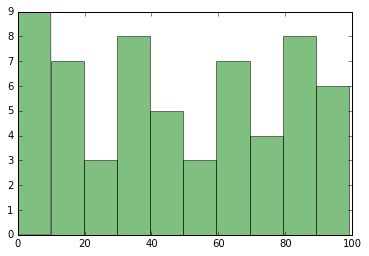

In [48]:
grades = [17, 65, 5, 74, 93, 1, 94, 16, 80, 95, 32, 78, 17, 70, 22, 43, 95, 67, 3, 30, 40, 51, 96, 17, 13, 21, 4, 47, 19, 44, 59, 6, 0, 83, 40, 89, 39, 57, 99, 35, 81, 31, 89, 63, 80, 85, 36, 60, 17, 68, 62, 36, 3, 28, 8, 38, 83, 73, 67, 2]
glist = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for g in grades:
#     glist[g/10] = glist[g/10] + 1
    glist[g/10] += 1
print glist

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(grades, 10, facecolor='green', alpha=0.5)

## For - general purpose: do something repeatedly
### print fibonacci number sequence

In [59]:
print range(10)
print range(1, 10)
print range(5, 10)

# 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, ...
a, b = 0, 1
for i in range(10):
    a, b = b, a+b
    print i+1, "\t", b


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]
1 	1
2 	2
3 	3
4 	5
5 	8
6 	13
7 	21
8 	34
9 	55
10 	89


In [62]:
print "%f\t%f"%(1, 1.1)
print "%d\t%d"%(1, 1.1)
print "%s\t%s"%(1, 1.1)


1.000000	1.100000
1	1
1	1.1


In [57]:
a, b = 0, 1
for i in range(10):
    print "%d\t%d"%(i, a)
    a, b = b, a+b


0	0
1	1
2	1
3	2
4	3
5	5
6	8
7	13
8	21
9	34
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9]
[3, 5, 7, 9]


In [64]:
x, s = 0.0, 1

for i in range(0,3000000,2):
    x += s*(1.0/(1+i))*4
    s= -s
print x


3.14159198692


In [74]:
print range(0)
for i in range(10):
    for j in range(10-i):
        print "*",
    print ""

[]
* * * * * * * * * * 
* * * * * * * * * 
* * * * * * * * 
* * * * * * * 
* * * * * * 
* * * * * 
* * * * 
* * * 
* * 
* 


In [74]:
for i in range(10):
    print '*',
print 
for i in range(10):
    print '*',

* * * * * * * * * *
* * * * * * * * * *


In [5]:
for i in range(10):
    for j in range(10-i):
        print '*',
    print

* * * * * * * * * *
* * * * * * * * *
* * * * * * * *
* * * * * * *
* * * * * *
* * * * *
* * * *
* * *
* *
*


### Print 9x9 tables

In [91]:
for j in range(1, 10):
    for i in range(1, 10):
        print "%d*%d=%d"%(j, i, i*j),
    print ""

1*1=1 1*2=2 1*3=3 1*4=4 1*5=5 1*6=6 1*7=7 1*8=8 1*9=9 
2*1=2 2*2=4 2*3=6 2*4=8 2*5=10 2*6=12 2*7=14 2*8=16 2*9=18 
3*1=3 3*2=6 3*3=9 3*4=12 3*5=15 3*6=18 3*7=21 3*8=24 3*9=27 
4*1=4 4*2=8 4*3=12 4*4=16 4*5=20 4*6=24 4*7=28 4*8=32 4*9=36 
5*1=5 5*2=10 5*3=15 5*4=20 5*5=25 5*6=30 5*7=35 5*8=40 5*9=45 
6*1=6 6*2=12 6*3=18 6*4=24 6*5=30 6*6=36 6*7=42 6*8=48 6*9=54 
7*1=7 7*2=14 7*3=21 7*4=28 7*5=35 7*6=42 7*7=49 7*8=56 7*9=63 
8*1=8 8*2=16 8*3=24 8*4=32 8*5=40 8*6=48 8*7=56 8*8=64 8*9=72 
9*1=9 9*2=18 9*3=27 9*4=36 9*5=45 9*6=54 9*7=63 9*8=72 9*9=81 


In [92]:
## how to generate 9x9 table?
# print a, b, ...The comma(,) means concatenation. 
# Another concatenation is PLUS(+), only workable when the data is "string" type
for i in range(1, 10):
    print i
for i in range(1, 10):
    print "%d* = "%i

for i in range(1, 10):
    for j in range(1, 10):
        print "%d*%d=%d "%(i, j, i*j),

1
2
3
4
5
6
7
8
9
1* = 
2* = 
3* = 
4* = 
5* = 
6* = 
7* = 
8* = 
9* = 
1*1=1  1*2=2  1*3=3  1*4=4  1*5=5  1*6=6  1*7=7  1*8=8  1*9=9  2*1=2  2*2=4  2*3=6  2*4=8  2*5=10  2*6=12  2*7=14  2*8=16  2*9=18  3*1=3  3*2=6  3*3=9  3*4=12  3*5=15  3*6=18  3*7=21  3*8=24  3*9=27  4*1=4  4*2=8  4*3=12  4*4=16  4*5=20  4*6=24  4*7=28  4*8=32  4*9=36  5*1=5  5*2=10  5*3=15  5*4=20  5*5=25  5*6=30  5*7=35  5*8=40  5*9=45  6*1=6  6*2=12  6*3=18  6*4=24  6*5=30  6*6=36  6*7=42  6*8=48  6*9=54  7*1=7  7*2=14  7*3=21  7*4=28  7*5=35  7*6=42  7*7=49  7*8=56  7*9=63  8*1=8  8*2=16  8*3=24  8*4=32  8*5=40  8*6=48  8*7=56  8*8=64  8*9=72  9*1=9  9*2=18  9*3=27  9*4=36  9*5=45  9*6=54  9*7=63  9*8=72  9*9=81 


# for  - example: printing Youbike data minute by minute
* [python time module](https://docs.python.org/2/library/time.html#time.sleep)

In [1]:
import time
for i in range(60*24*7):
    print i
    time.sleep(60)
    # get ubike data code

0


KeyboardInterrupt: 

In [ ]:
import urllib
import json
import gzip
url = 'http://data.taipei/youbike'

for i in range(10):
    urllib.urlretrieve(url, "data.gz")
    data_str = gzip.open('data.gz', 'r').read()
    bike_data = json.loads(data_str)
    print bike_data["retVal"].values()[0]['mday']
    for site in bike_data["retVal"].keys():
        print "%s\t%-20s\t%s\t%s"%(bike_data["retVal"][site]["sno"], 
                                   bike_data["retVal"][site]["sna"], 
                                   bike_data["retVal"][site]['sbi'],
                                   bike_data["retVal"][site]['tot'])